# Exercises

In [2]:
import caiman as cm
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

input_tif_file_path = 'data/caiman_video_trial_0.tif'
original_movie = cm.load(input_tif_file_path)

## Exercise 1: Image characteristics
---

**A.** Distiguishing pixels   

Fluctuations in the activitation of the neuron can be directly observed on the video or in a temporal trace plot. Plotting the temporal trace will allow us to see the calcium transient dinamic, if a pixel belonging to a neuron is selected. 

* Select a set of *N* random pixels from the ROI and plot the temporal evolution of pixel value. If the random pixels are choosen from an active neuron, you will be able to see the calcium transcient dynamic. 

**B.** Temporal statistics
 * For the selected pixels, plot the histogram of pixel value. What are the difference in different regions?, and how can that help to differ a neuron from the background?

* If we can already see the calcium traces from the row data, why do we need to do a segmentation of the neurons? Why, as a starter, would not be a good idea to work directly with the temporal traces? 

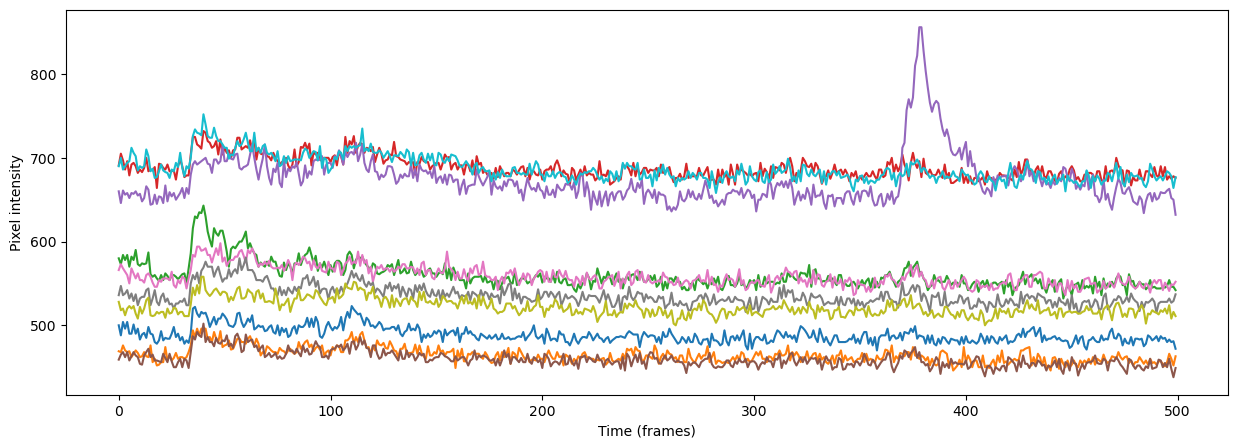

In [24]:
# Randomly select 10 pixels
np.random.seed(999)
random_x = np.random.randint(0, original_movie.shape[1], 10)
random_y = np.random.randint(0, original_movie.shape[2], 10)
pixels = original_movie[:, random_x, random_y]

# Plot the time series of the selected pixels
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.plot(pixels[:, i])
plt.xlabel('Time (frames)')
plt.ylabel('Pixel intensity')
plt.show()

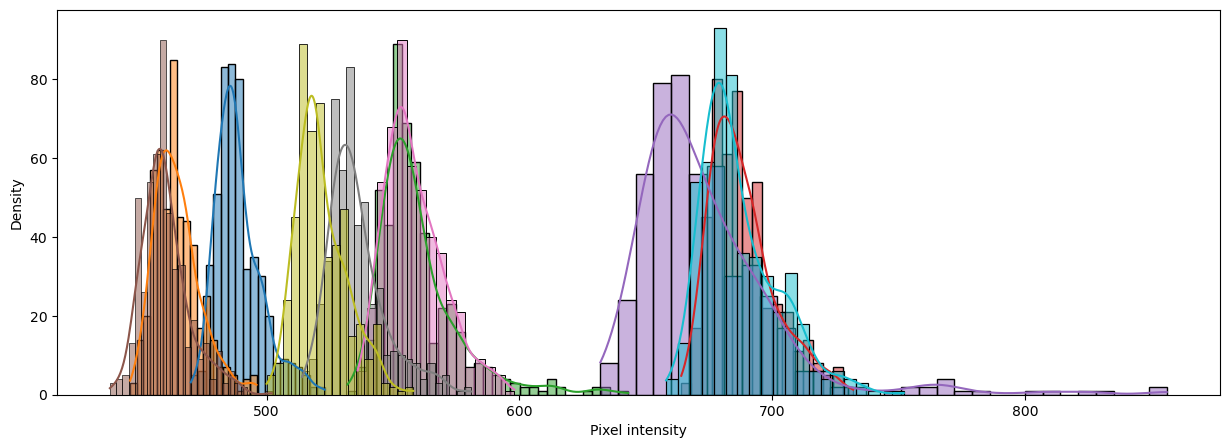

In [25]:
# For selected pixels, plot the distribution of pixel intensities
plt.figure(figsize=(15, 5))
for i in range(10):
    sns.histplot(pixels[:, i], kde=True)
plt.xlabel('Pixel intensity')
plt.ylabel('Density')
plt.show()

From the pixels selected, it can be seen that they tend to fall into two clusters, one with higher values and the other with lower values. The background pixels may generally have lower values, because they do not contain neurons and do not contribute a lot to the calcium signals. On the other hand, the neuron pixels should have higher values because there are calcium activities.

Possible reasons for not directly analyzing raw pixel values:
- Individual neurons cannot be accurately identified, which sacrifices the spatial resolution. 
- The raw pixel values without source extraction could be noiser.
- Using raw data makes connectivity analysis more difficult.

## Exercise 2: motion correction parameters
---

One parameter that impacts motion correction performance is the size of the spatial filter that is applyed to the video.

* Use the following function from CaImAn and plot the result of different space filtering applyed to a single frame of the video:from caiman.motion_correction import high_pass_filter_space

* How will this filtering affect the measure of crispness?

* Acording to Pnevmatikakis et al, which other factors are relevant for pw-rigid motion correction?

- Explore the impact of different parameters in the output of motion correction algorithm by measuring crispness in the correlation image of the final outcome. Particularly measure the effect of different spatial filter size by applying motion correction algorithm multiple times and computing the crispness of the output video. 

- Display all crispness values for rigid and not rigid motion correction and plot them agains gSig_filters values.

- If possible, show the impact of the crispness value that comes from changing other relevant paraments.

*Note1: The is no need to save all the motion corrected movies, just save the cripsness values.*

*Note2: gSig_filters is an optional range of posible values, but if your computer gets to slow in the computation reduce the range.*


## Exercise 3: Source extraction parameters 
---

* For a fixed minimum correlation value (ie 0.6) select a range of possible PNR minimun values and study the impact of those in the final source extraction output.

* For a fixed value of PNR (ie 6) select a range of minimum correlation valur and study the impact of those in the final source extraction output.

* How do these paramenters affect the spatial sparcity of the output? Which set of parameter selection procedes the higher number of neurons? Is maximal number of neurons always better? Why?  

* Generate a plot of number of neurons vs PNR (or min corr value) to show how these parameters affect the source extracted signals.

* Are the temporal traces affected by these parameters?

* For different PNR and minimum correlation value plot the correlation image and the selected cells.